In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
!pip install japanize-matplotlib
import japanize_matplotlib
import seaborn as sns
sns.set(font='IPAexGothic')
from google.colab import drive
drive.mount('/content/drive')
mount_dir="/content/drive/MyDrive"
this_dir=mount_dir+"/git_repos/probspace/野菜取引価格の予測"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# データ読み込み

In [2]:
p_df=pd.read_csv(this_dir+"/data/price_df.csv",index_col=0)
w_df=pd.read_csv(this_dir+"/data/weather_df.csv",index_col=0)
rw_df=pd.read_csv(this_dir+"/data/each_region_weather_df.csv",index_col=0)
aw_df=pd.read_csv(this_dir+"/data/each_area_weather_df.csv",index_col=0)
pw_df=pd.read_csv(this_dir+"/data/marged_price_weather_df.csv",index_col=0)
rw_pca_df=pd.read_csv(this_dir+"/data/rw_pca_df.csv",index_col=0)

In [ ]:
def get_idx(veg,region,df=pw_df):
  return (df["veg"]==veg)&(df["region"]==region)

In [ ]:
enoki=pw_df.loc[get_idx("えのきだけ","中国"),:].reset_index(drop=True)
enoki_qua=enoki.iloc[:,3:] #quantitative data

In [ ]:
enoki.head()

,date,veg,region,price,日最低気温0℃未満日数(日),日平均気温25℃以上日数(日),日最高気温25℃以上日数(日),最高気温(℃),最深積雪(cm),日最低気温25℃以上日数(日),...,最低気温(℃),日照時間0.1時間未満日数(日),降水量の合計(mm),日最高気温0℃未満日数(日),日降水量の最大(mm),平均気温(℃),降雪量合計(cm),pca1,pca2,pca3
0,2016-01-01,えのきだけ,中国,314.0,15.541667,0.0,0.000000,15.212500,41.35,0.0,...,-7.262500,6.500000,156.104167,1.375000,40.458333,3.254167,80.45,-15.432198,111.114956,6.770552
1,2016-02-01,えのきだけ,中国,306.0,15.708333,0.0,0.000000,17.020833,20.80,0.0,...,-5.300000,3.833333,126.500000,0.041667,34.937500,4.062500,54.10,-43.252816,63.124396,-1.394846
2,2016-03-01,えのきだけ,中国,245.0,8.708333,0.0,0.000000,21.358333,10.95,0.0,...,-2.666667,3.208333,74.145833,0.083333,27.750000,7.825000,4.80,-92.273332,-13.185671,-11.306941
3,2016-04-01,えのきだけ,中国,227.0,1.375000,0.0,1.625000,26.154167,0.00,0.0,...,0.937500,5.500000,179.958333,0.000000,45.562500,13.654167,0.00,14.830751,-20.766182,-3.107150
4,2016-05-01,えのきだけ,中国,232.0,0.000000,0.0,12.708333,29.587500,0.00,0.0,...,6.216667,5.291667,121.979167,0.000000,40.854167,18.000000,0.00,-42.574799,-63.109741,17.003401


# pandas_profiling

In [3]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=e6ec4798044cf0993e1fa85d6e5470092c578df2c884d2389d60c3568914b9e8
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [4]:
!pip show pandas-profiling

Name: pandas-profiling
Version: 3.6.6
Summary: Deprecated 'pandas-profiling' package, use 'ydata-profiling' instead
Home-page: https://github.com/ydataai/pandas-profiling
Author: YData Labs Inc
Author-email: opensource@ydata.ai
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: ydata-profiling
Required-by: 


In [12]:
from pandas_profiling import ProfileReport
profile = ProfileReport(rw_df)

In [13]:
profile.to_file(this_dir+"/data/profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

ストリーミング出力は最後の 5000 行に切り捨てられました。
/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:73: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:73: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:73: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:73: UserWarning: Glyph 27671 (\N{CJK UNIFIED IDEOGRAPH-6C17}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:73: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/pandas_p

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:73: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:73: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:73: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:73: UserWarning: Glyph 20061 (\N{CJK UNIFIED IDEOGRAPH-4E5D}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:73: UserWarning: Glyph 24030 (\N{CJK UNIFIED IDEOGRAPH-5DDE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 相関係数

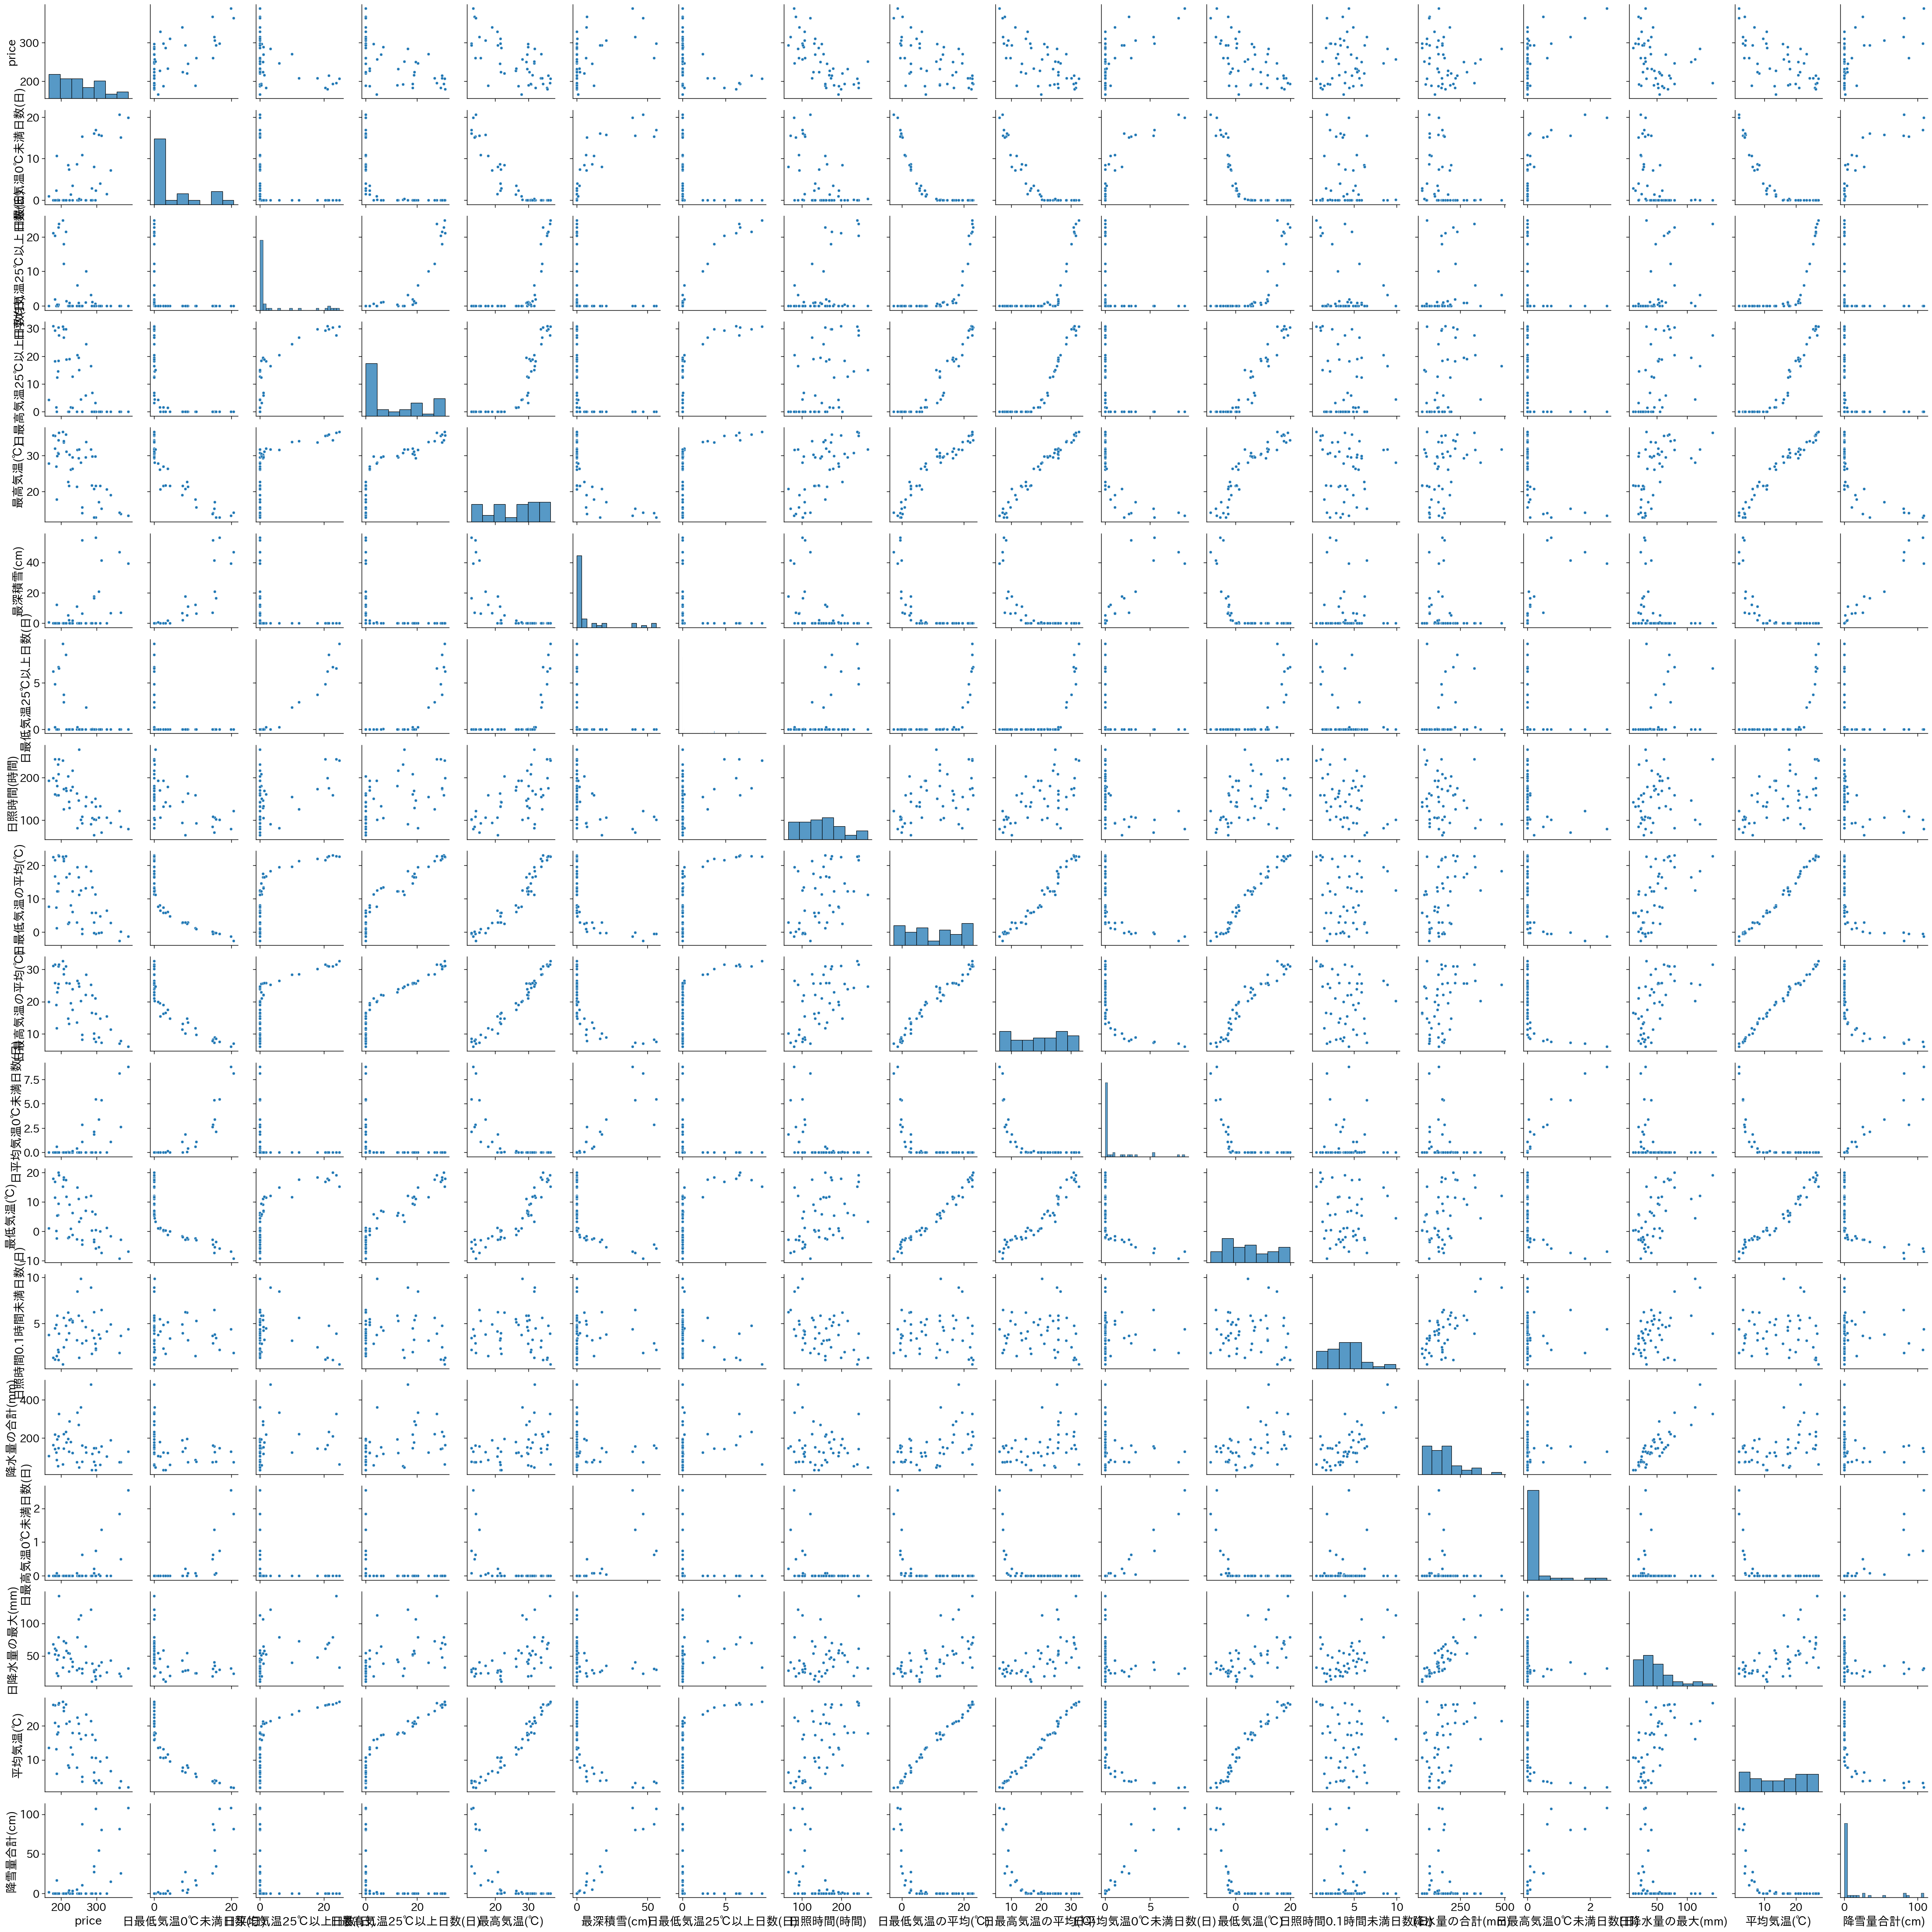

In [ ]:
#https://datadriven-rnd.com/2021-01-30-153731/
sns.set_context('paper', font_scale=2.0)
pp = sns.pairplot(enoki_qua)
pp.savefig(this_dir+"/img/pairplot.png")

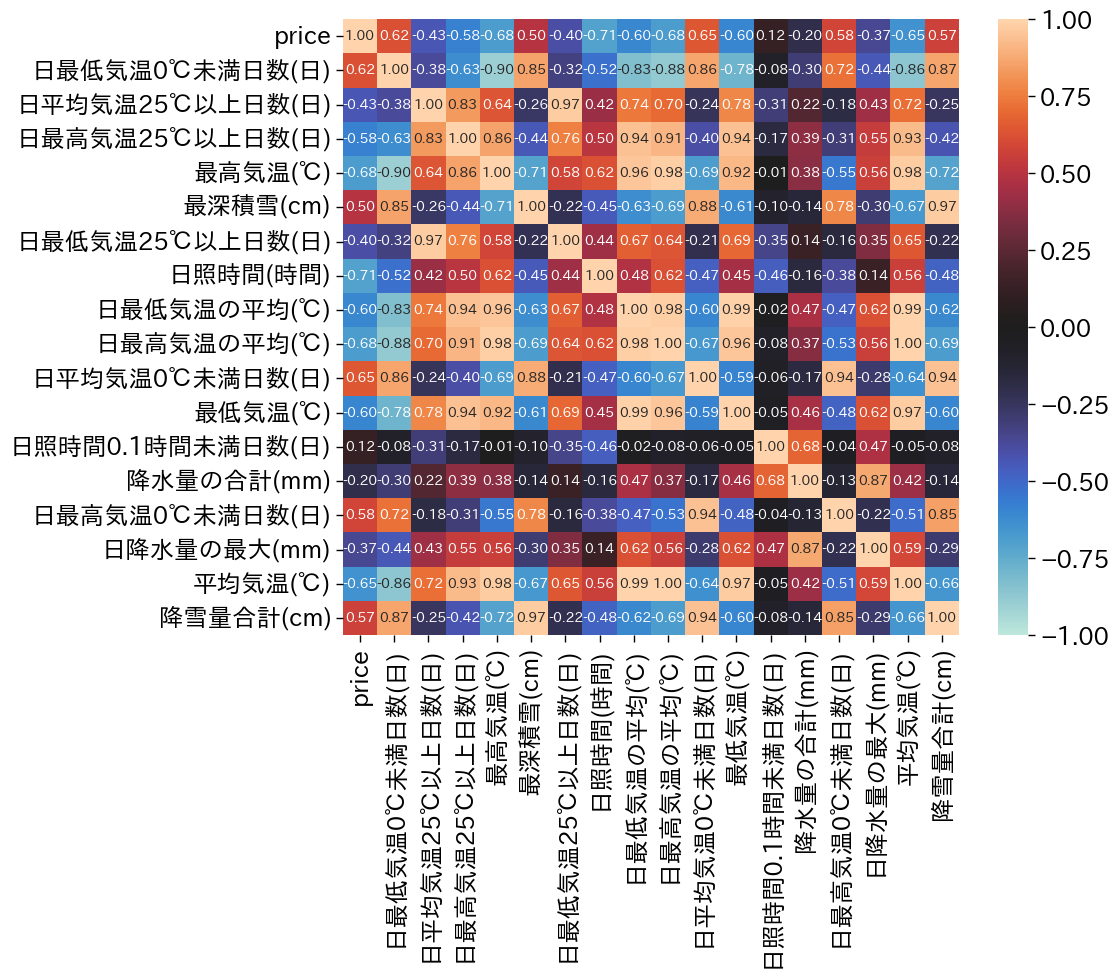

In [ ]:
corr=enoki_qua.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, square=True, annot=True, fmt='.2f',annot_kws={'size':10},vmax=1, vmin=-1, center=0)
plt.ylim(corr.shape[1],0)
#plt.savefig(this_dir+"/img/corr.png")
plt.show()

# seasonal
https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.DecomposeResult.html#statsmodels.tsa.seasonal.DecomposeResult
https://qiita.com/shinji_komine/items/9dbada69b9128f645660

In [ ]:
veg="トマト"
df=pw_df.loc[get_idx(veg,"中国"),:].reset_index(drop=True)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["price"], period=12, two_sided=True)

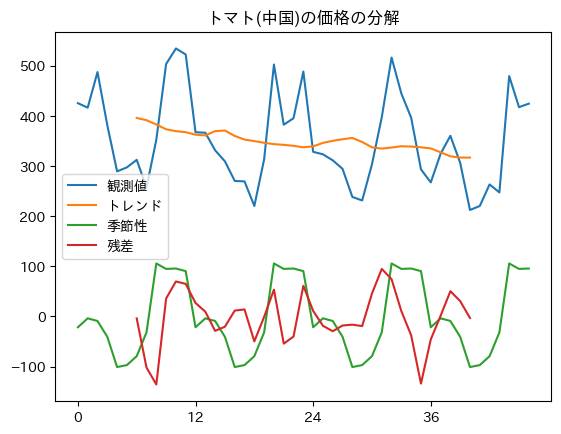

In [ ]:
fig, ax= plt.subplots()
t=df["date"]
ax.plot(result.observed,label="観測値")
ax.plot(result.trend,label="トレンド")
ax.plot(result.seasonal,label="季節性")
ax.plot(result.resid,label="残差")
ax.legend(loc=0)
ax.set_xticks(df.index.values[0::12])
#ax.set_xticklabels([t.values])
ax.set_title(f"{veg}(中国)の価格の分解")
plt.show()

# 天気と残差

In [ ]:
rw_pca_df.head()

,date,region,日最低気温0℃未満日数(日),日平均気温25℃以上日数(日),日最高気温25℃以上日数(日),最高気温(℃),最深積雪(cm),日最低気温25℃以上日数(日),日照時間(時間),日最低気温の平均(℃),...,最低気温(℃),日照時間0.1時間未満日数(日),降水量の合計(mm),日最高気温0℃未満日数(日),日降水量の最大(mm),平均気温(℃),降雪量合計(cm),pca1,pca2,pca3
0,2015-01-01,中国,13.041667,0.0,0.0,12.325000,27.050000,0.0,71.562500,0.425000,...,-3.875000,4.833333,176.500000,0.625000,38.437500,3.625000,75.500000,4.854736,105.814863,-0.315730
1,2015-01-01,中部,20.224490,0.0,0.0,10.797959,92.275000,0.0,106.108163,-1.867347,...,-6.573469,7.469388,177.846939,2.632653,30.540816,1.642857,148.875000,-9.361618,137.170069,95.562664
2,2015-01-01,九州,4.461538,0.0,0.0,17.219231,0.222222,0.0,129.892308,4.450000,...,-0.407692,3.230769,112.923077,0.038462,35.692308,8.280769,0.222222,-50.186609,8.552658,-33.955904
3,2015-01-01,北海道,30.800000,0.0,0.0,5.160000,75.270000,0.0,91.469000,-9.399000,...,-17.180000,6.660000,56.400000,17.640000,12.830000,-4.632000,118.810000,-126.870836,126.503494,50.293765
4,2015-01-01,北陸,15.411765,0.0,0.0,12.388235,50.941176,0.0,46.288235,-0.052941,...,-2.994118,10.529412,256.970588,0.058824,31.294118,2.664706,104.117647,76.684696,153.919135,20.874477


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


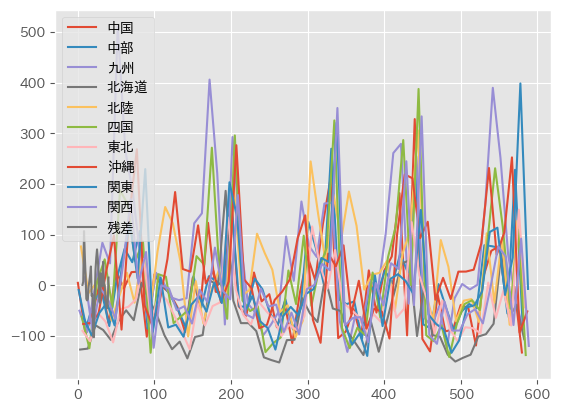

In [ ]:
fig, ax= plt.subplots()
for r in rw_pca_df["region"].unique():
  ax.plot(rw_pca_df.loc[rw_pca_df["region"]==r,"pca1"],label=r)
ax.plot(result.resid,label="残差")
ax.legend(loc=0)
plt.show()

In [ ]:
tmp_df=pd.DataFrame(result.resid,columns=["resid"]).shift()
pca_n="pca1"
for r in rw_pca_df["region"].unique():
  tmp_df=pd.concat([tmp_df,rw_pca_df.loc[rw_pca_df["region"]==r,pca_n].rename(pca_n+"_"+r).reset_index(drop=True)],axis=1)

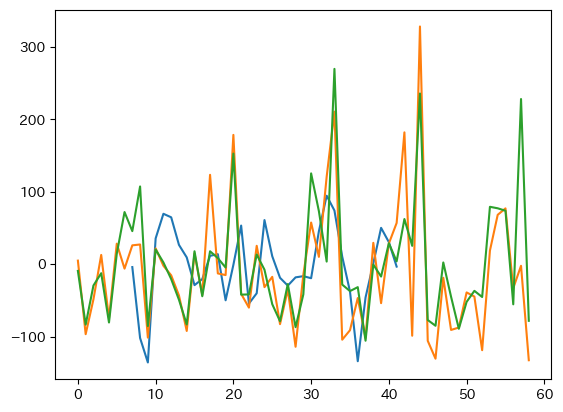

In [ ]:
plt.plot(tmp_df.iloc[:,0:3])

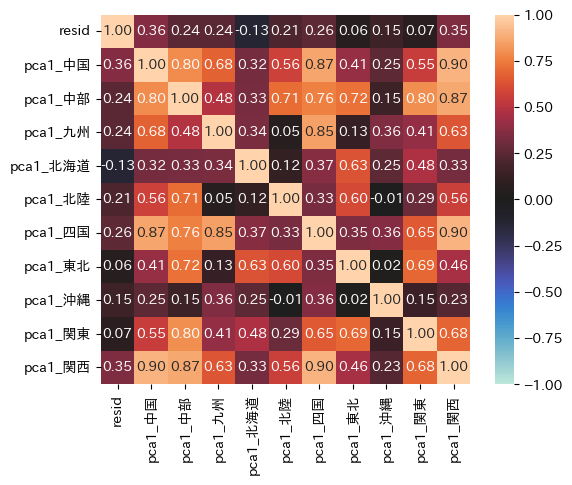

In [ ]:
#各pcaの過去12ヶ月から残差を予測できるか
corr=tmp_df.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, square=True, annot=True, fmt='.2f',annot_kws={'size':10},vmax=1, vmin=-1, center=0)
plt.ylim(corr.shape[1],0)
#plt.savefig(this_dir+"/img/corr.png")
plt.show()

In [ ]:
tmp_df=pd.DataFrame(result.resid,columns=["resid"])
pca_n="pca3"
for r in rw_pca_df["region"].unique():
  corr=pd.concat([tmp_df,rw_df.loc[rw_df["region"]==r,:].iloc[:,2:].reset_index(drop=True)],axis=1).corr()
  fig, ax = plt.subplots()
  sns.heatmap(corr, square=True, annot=True, fmt='.2f',annot_kws={'size':10},vmax=1, vmin=-1, center=0)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Prophet


In [ ]:
from prophet import Prophet

In [ ]:
df=enoki.loc[:,["date","price"]].rename(columns={'date': 'ds',"price":'y'})
df.head()

,ds,y
0,2016-01-01,314.0
1,2016-02-01,306.0
2,2016-03-01,245.0
3,2016-04-01,227.0
4,2016-05-01,232.0


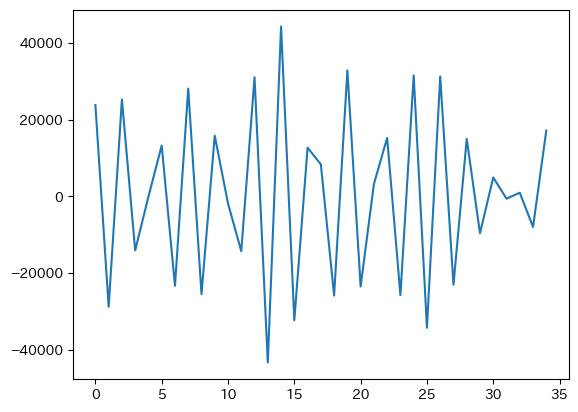

In [ ]:
plt.plot(np.diff(df['y'],12))

In [ ]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77ivi_h9/9e20c6rw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77ivi_h9/jbzh2g11.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13204', 'data', 'file=/tmp/tmp77ivi_h9/9e20c6rw.json', 'init=/tmp/tmp77ivi_h9/jbzh2g11.json', 'output', 'file=/tmp/tmp77ivi_h9/prophet_modeldz_gcqpl/prophet_model-20230721012102.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:21:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:21:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
72,2019-11-27
73,2019-11-28
74,2019-11-29
75,2019-11-30
76,2019-12-01


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
72,2019-11-27,252.529651,221.987836,282.998691
73,2019-11-28,262.854113,233.937836,291.611671
74,2019-11-29,277.927511,248.151436,307.087695
75,2019-11-30,297.455010,266.862806,328.312284
76,2019-12-01,321.009560,291.026013,353.034056


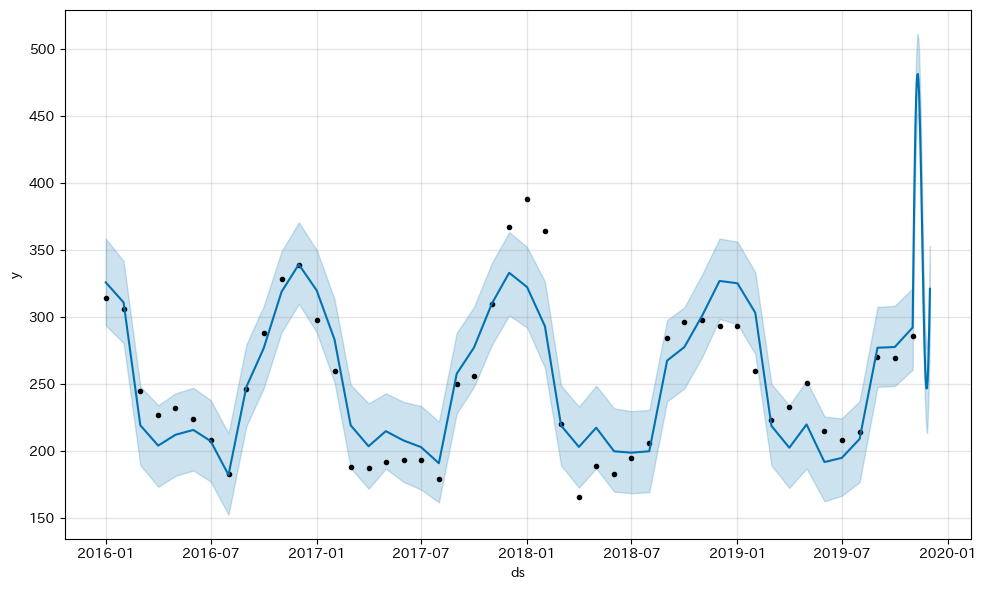

In [ ]:
fig1 = m.plot(forecast)

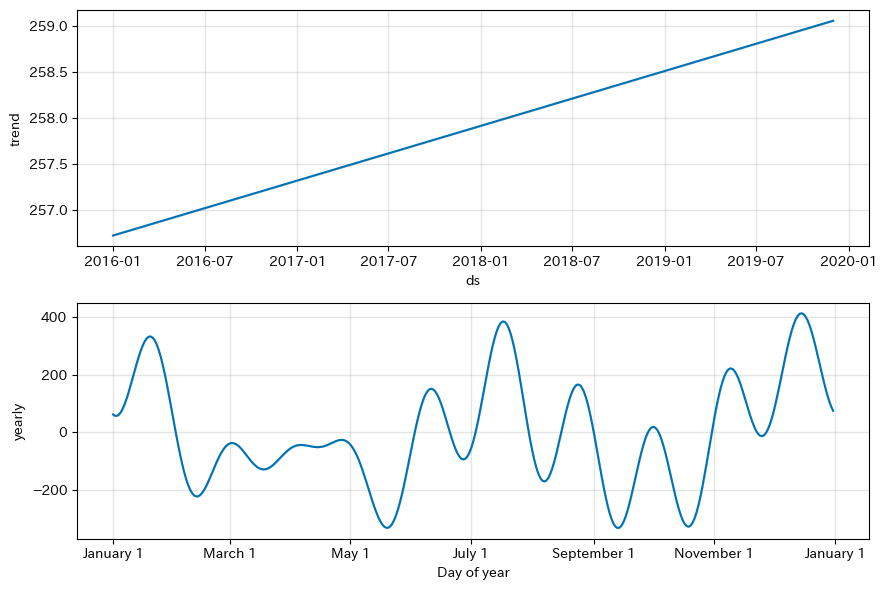

In [ ]:
fig2 = m.plot_components(forecast)